In [1]:
import glob
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

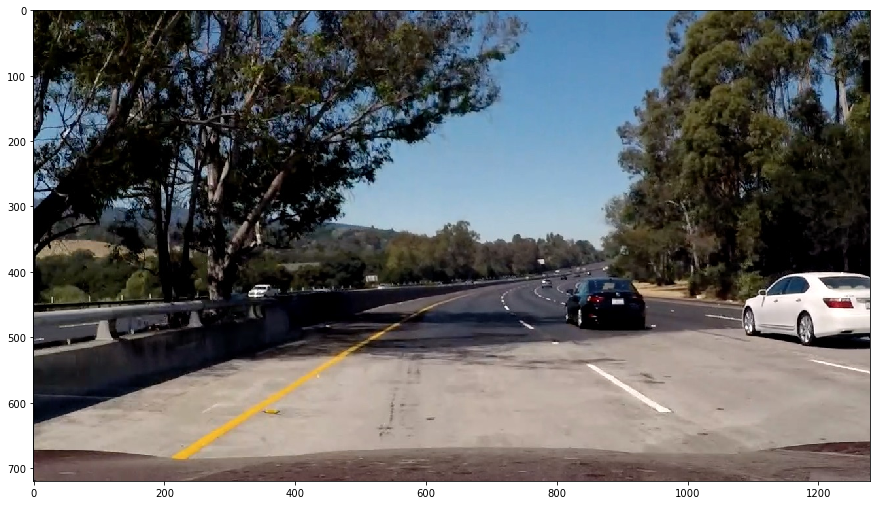

In [2]:
# Test images to create the color threasholds
test_image = cv2.imread("test_images/test5.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (15,15))
plt.imshow(test_image)
plt.show()

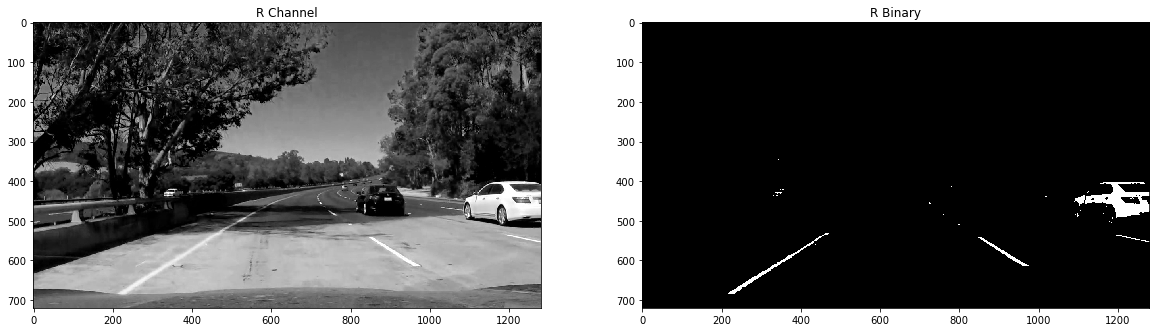

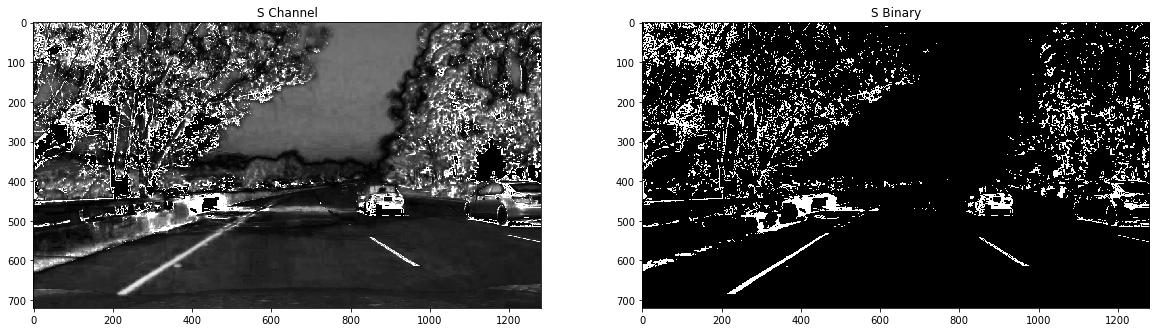

In [3]:
color_thresholds = {
    "R": [226, 255],
    "S": [170, 255]
}

binary_images = {}
for channel, thresh in color_thresholds.items():
    if channel == 'H' or channel == 'L' or channel == 'S':
        colorChannel_image = utils.get_channel(utils.convert_to_HLS(test_image), channel)
    else:
        colorChannel_image = utils.get_channel(test_image, channel)
    binary_image = utils.color_thresh(colorChannel_image, thresh)
    binary_images[channel] = binary_image
    title1 = channel + " Channel"
    title2 = channel + " Binary"
    utils.plot_side_by_side(colorChannel_image, binary_image, title1, title2, gray=True)

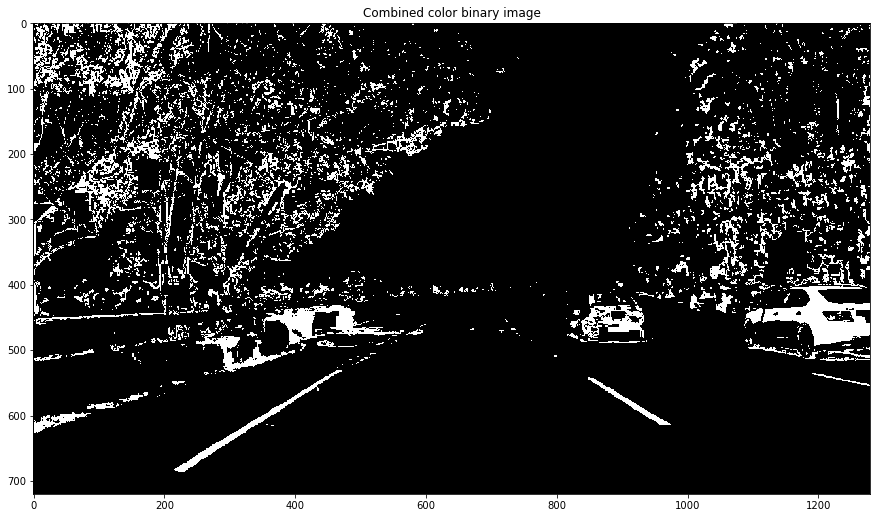

In [4]:
combined_binary_image = np.zeros_like(binary_images['R'])
combined_binary_image[(binary_images['R'] == 1) | (binary_images['S'] == 1)] = 1

plt.figure(figsize = (15,15))
plt.title("Combined color binary image")
plt.imshow(combined_binary_image, cmap='gray')
plt.show()

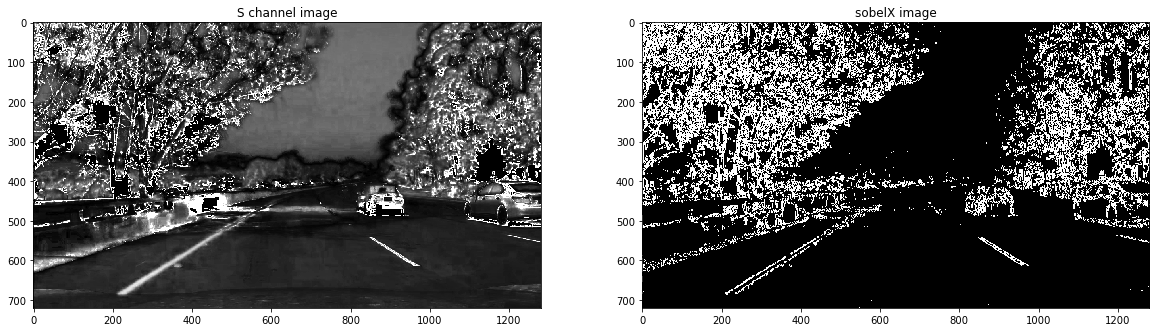

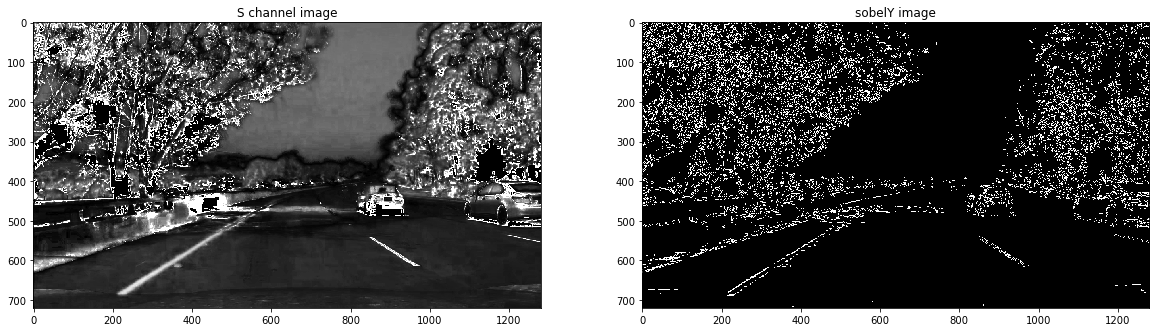

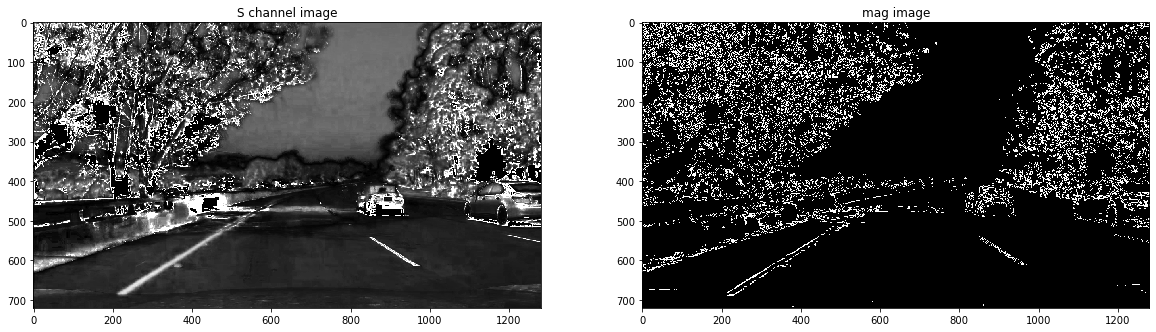

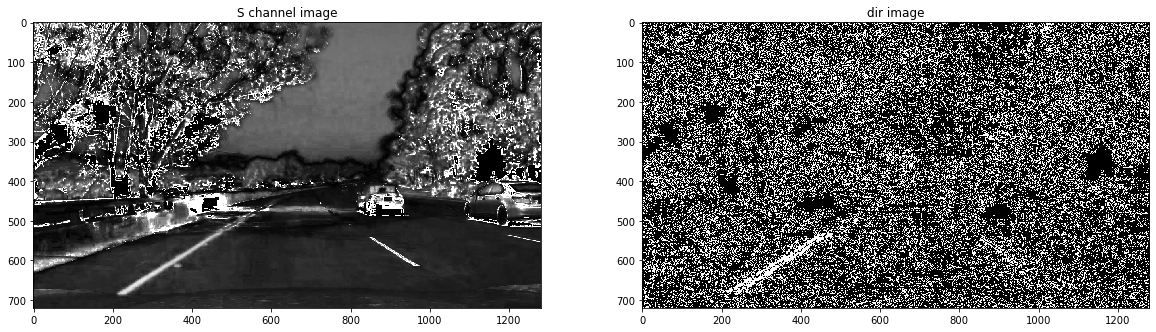

In [5]:
sobel_thresholds = {
    'sobelX': [20, 255],
    'sobelY': [40, 100],
    'mag': [40, 100],
    'dir': [0.65, 1.2]
}

s_channel_image = utils.get_channel(utils.convert_to_HLS(test_image), 'S')

for operator, thresh in sobel_thresholds.items():
    if operator == "sobelX":
        binary_image = utils.absolute_sobel_thresh(s_channel_image, 'x', 3, thresh)
    elif operator == "sobelY":
        binary_image = utils.absolute_sobel_thresh(s_channel_image, 'y', 3, thresh)
    elif operator == "mag":
        binary_image = utils.magnitude_thresh(s_channel_image, 3, thresh)
    elif operator == "dir":
        binary_image = utils.direction_threshold(s_channel_image, 3, thresh)
    binary_images[operator] = binary_image
    title1 = "S channel image"
    title2 = operator + " image"
    utils.plot_side_by_side(s_channel_image, binary_image, title1, title2, gray=True)
    

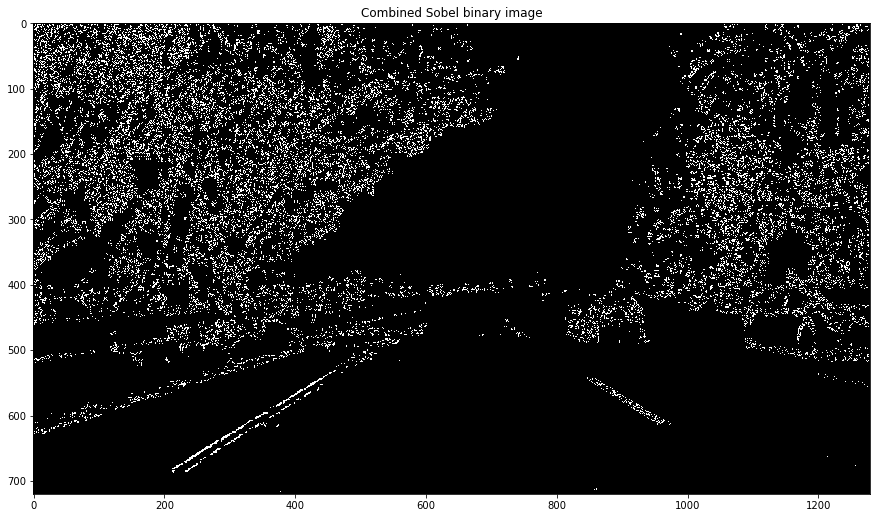

In [6]:
combined_sobel_image = np.zeros_like(binary_images['sobelX'])
combined_sobel_image[((binary_images['sobelX'] == 1) & (binary_images['sobelY'] == 1)) | ((binary_images['mag'] == 1) & (binary_images['dir'] == 1))] = 1

plt.figure(figsize = (15,15))
plt.title("Combined Sobel binary image")
plt.imshow(combined_sobel_image, cmap='gray')
plt.show()

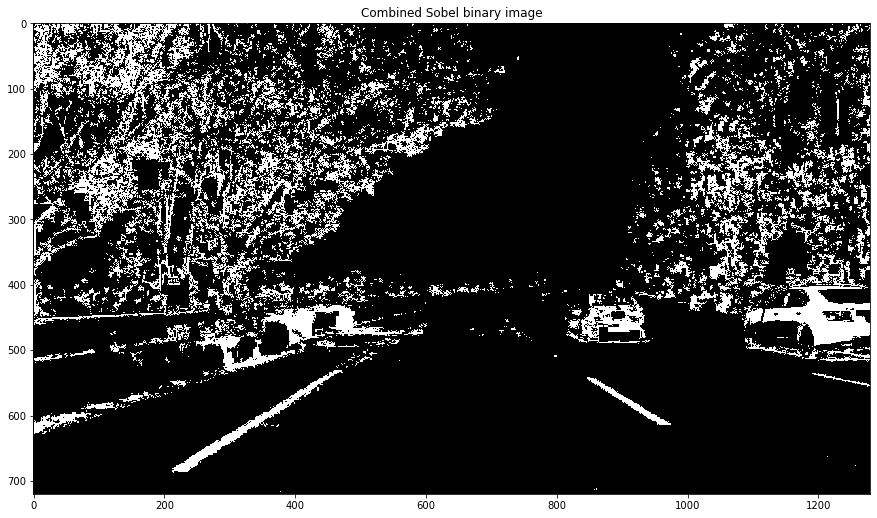

In [7]:
final_image = np.zeros_like(combined_sobel_image)
final_image[(combined_sobel_image == 1) | (combined_binary_image == 1)] = 1

plt.figure(figsize = (15,15))
plt.title("Combined Sobel binary image")
plt.imshow(final_image, cmap='gray')
plt.show()

# Test edge detection pipeline

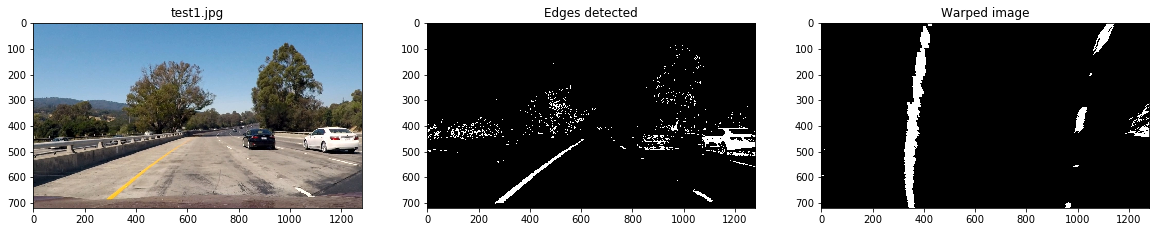

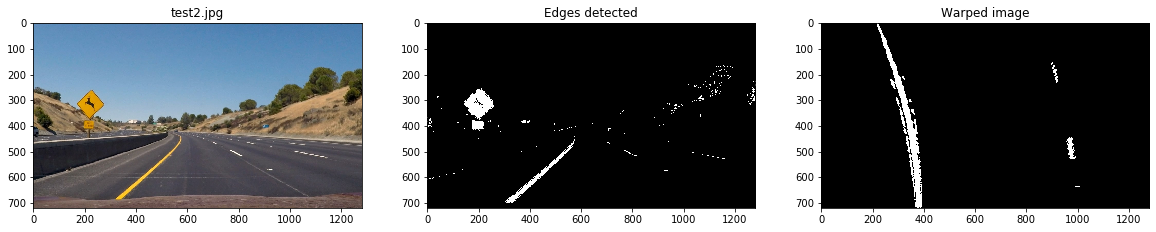

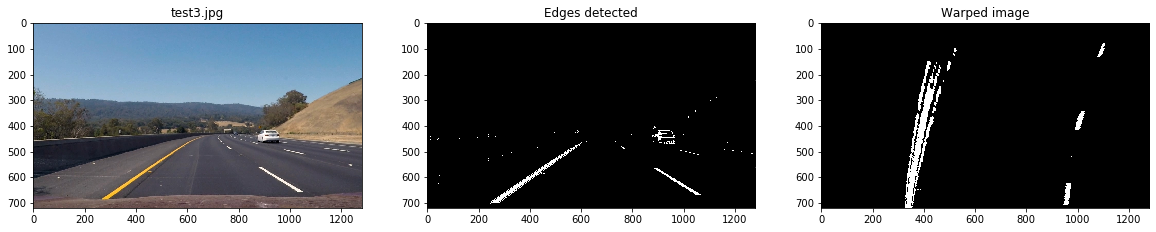

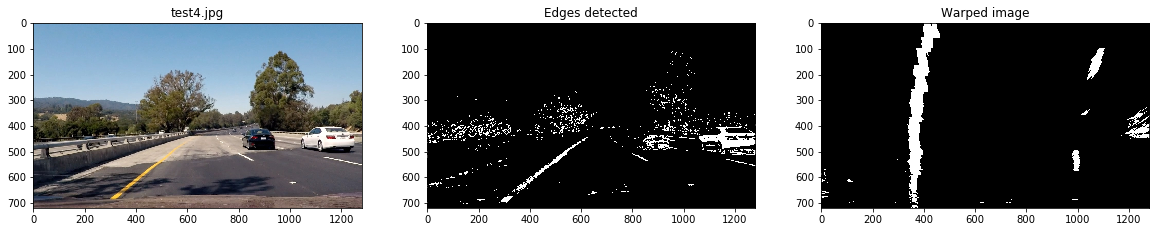

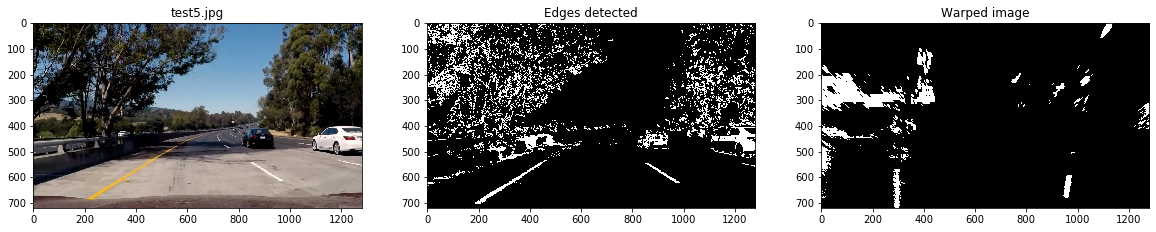

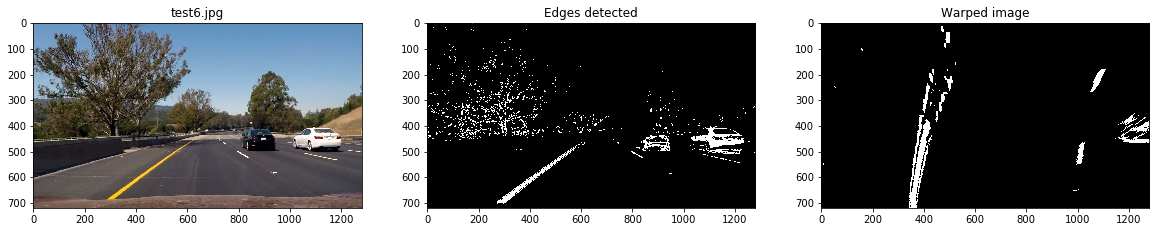

In [8]:
cameraData = utils.loadCameraData()

for filename in glob.glob('test_images/test*.jpg'):
    filename = Path(filename)
    image = cv2.imread(str(filename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    edges = utils.find_edges(image, cameraData)
    warped = utils.find_edges_warped(image, cameraData)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    ax1.set_title(filename.name)
    ax2.set_title("Edges detected")
    ax3.set_title("Warped image")
    
    ax1.imshow(image)
    ax2.imshow(edges, cmap="gray")
    ax3.imshow(warped, cmap="gray")
    
    plt.show()